In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

### Exploratory Analysis

In [2]:
reviews = pd.read_csv('dataset/reviews.csv')
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [3]:
listings = pd.read_csv('dataset/listings.csv')
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [4]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


<ipython-input-6-32bddef62556>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(listings.corr(), annot=True, fmt=".2f")


<AxesSubplot:>

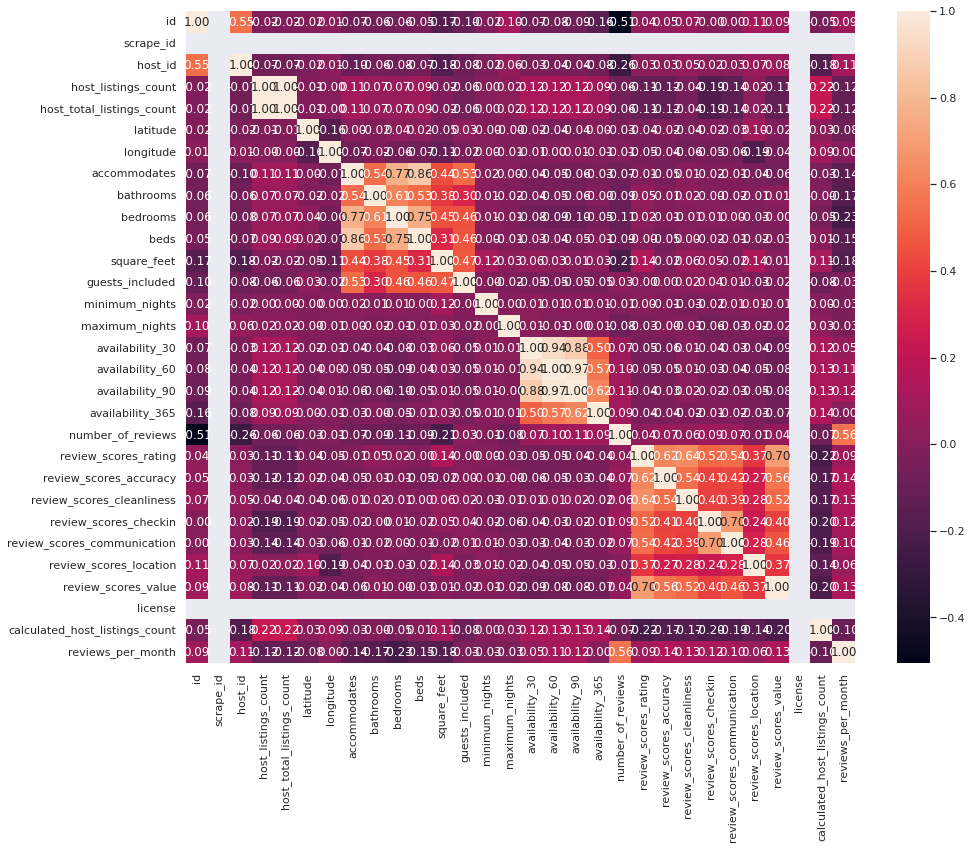

In [6]:
sns.set(rc={'figure.figsize':(15,12)})
sns.heatmap(listings.corr(), annot=True, fmt=".2f")

In [7]:
calendar = pd.read_csv('dataset/calendar.csv')
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


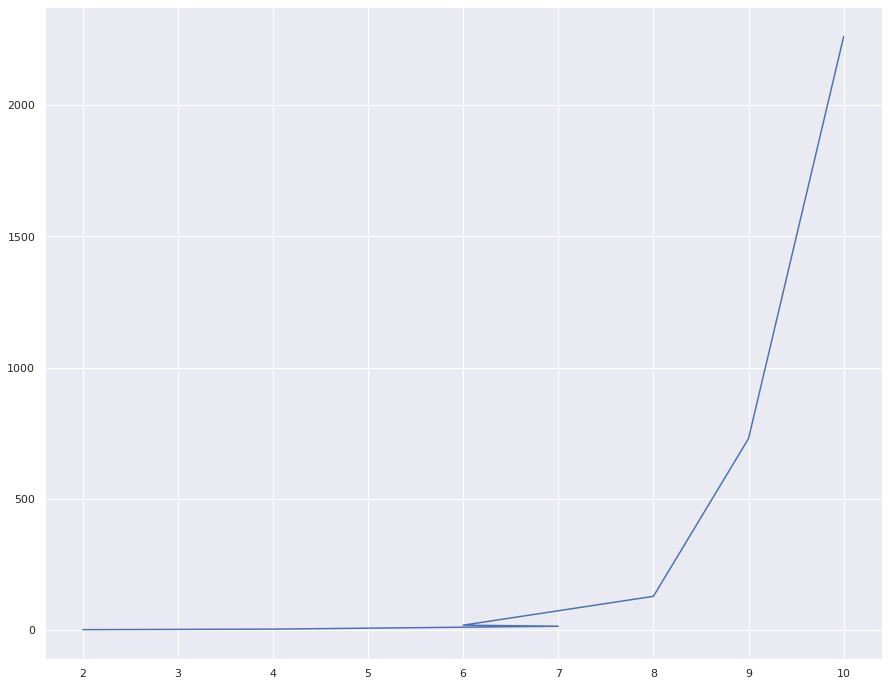

In [8]:
plt.plot(listings["review_scores_accuracy"].value_counts())

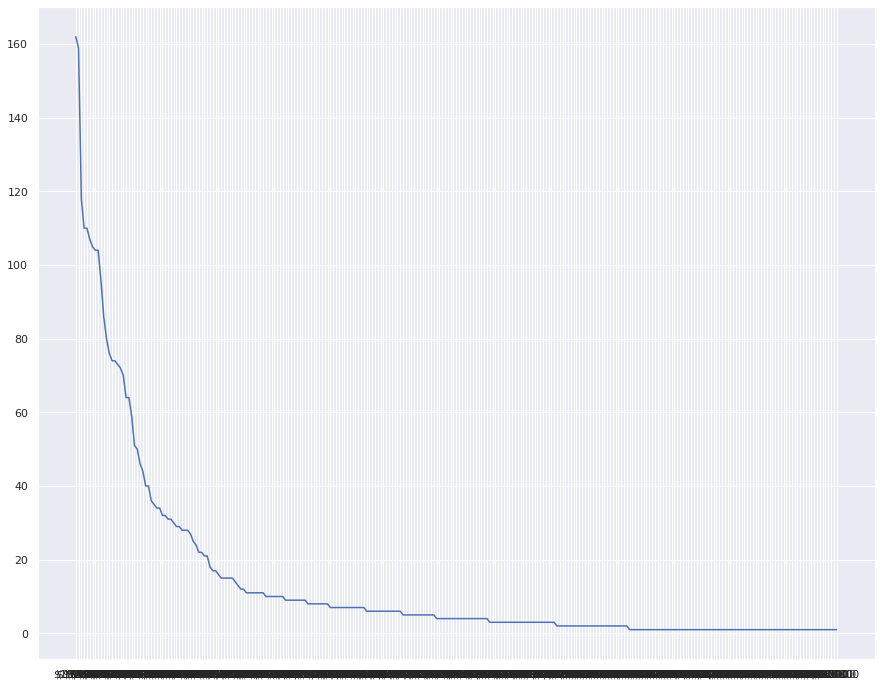

In [9]:
plt.plot(listings["price"].value_counts())

### Questions about data:

1.   What months of the year register more activities in Seattle Airbnb?
2.   Which Seattle regions have the accomodations with the biggest mean prices?
3. Is it possible to predict the accomodation price by using attributes such as neiborhood, number of roons, etc?



### Question 1

Checking missing values

In [10]:
per_dates = 1 - len(reviews['date'].dropna())/len(reviews['date'])
print("Missing values in date column: {}".format(per_dates))

Missing values in date column: 0.0


Transform date in month and make aggregations.

In [11]:
reviews['month'] = reviews['date'].str[5:7]
agg = reviews.groupby('month')['id'].count()
agg

month
01     2867
02     2643
03     4158
04     4233
05     5854
06     8544
07    10503
08    13018
09    11677
10     8955
11     6665
12     5732
Name: id, dtype: int64

Plot the number of accomodations booked in which month.

<BarContainer object of 12 artists>

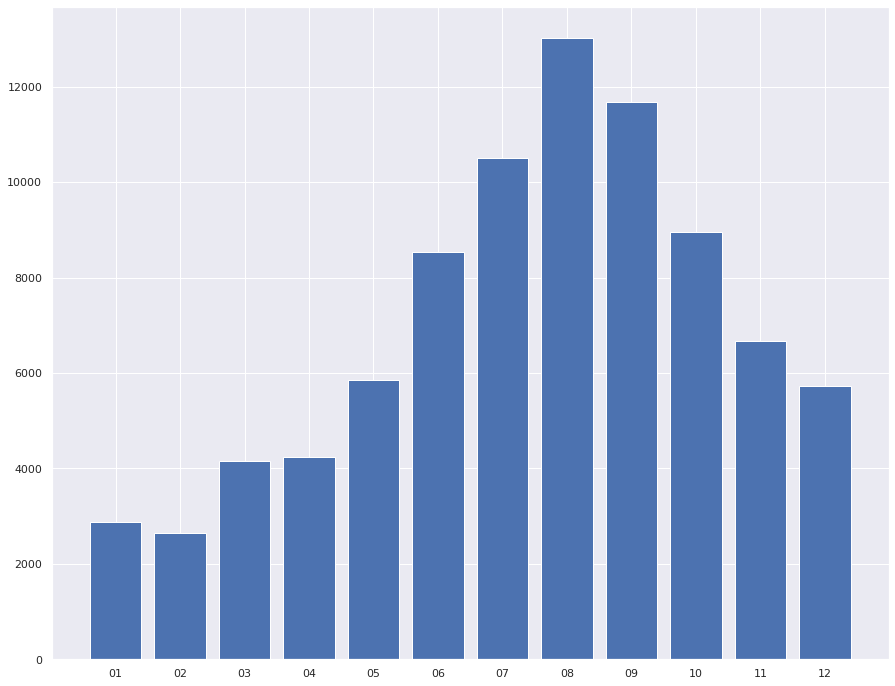

In [12]:
plt.bar(agg.index, agg.values)

Looking at the bar plot above we can see that the months that Airbnb has more accomodations booked is July, August and September.

### Question 2

Check missing data percentage in neighbourhood and price columns. We can see that none of than have a lot of missing values.

In [13]:
per_neigh = 1 - len(listings['neighbourhood'].dropna())/len(listings['neighbourhood'])
print("Missing values in neighborhood column: {}".format(per_neigh))

per_prices = 1 - len(listings['price'].dropna())/len(listings['price'])
print("Missing values in price column: {}".format(per_prices))

Missing values in neighborhood column: 0.108957569408067
Missing values in price column: 0.0


Drop lines that have missing neighbourhood values.

In [14]:
listings_q2 = listings.dropna(subset=['neighbourhood'])

Transform price column in float.

In [15]:
listings_q2['price_float'] = listings['price'].str[1:].str.replace(',', '').astype(float)
listings_q2['price_float']

<ipython-input-15-163ea0d28e29>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_q2['price_float'] = listings['price'].str[1:].str.replace(',', '').astype(float)


0        85.0
1       150.0
2       975.0
3       100.0
4       450.0
        ...  
3811     65.0
3812     95.0
3813    359.0
3814     79.0
3817     87.0
Name: price_float, Length: 3402, dtype: float64

Agregate neibourhoods and check price mean by groups.

In [16]:
agg = listings_q2.groupby('neighbourhood')['price_float'].mean().sort_values()
agg

neighbourhood
Roxhill                 60.000000
Olympic Hills           63.666667
Dunlap                  75.461538
Rainier Beach           76.722222
Georgetown              77.000000
                          ...    
Alki                   196.652174
Westlake               197.000000
Portage Bay            241.428571
Industrial District    245.000000
Fairmount Park         370.000000
Name: price_float, Length: 81, dtype: float64

So, by this list we can see that the most expensive neighbourhoods are Portage Bay, Industrial District and Fairmount Park. And we can verify that the cheeper neighbourhoods are Roxhill, Olympic Hills and Dunlap.

### Question 3

Check percentage of missing values in price column.

In [17]:
per_reviews = 1 - len(listings["price"].dropna())/len(listings["price"])
print("Missing values in reviews column: {}".format(per_reviews))

Missing values in reviews column: 0.0


Transform columns percentage values in float.

In [18]:
listings['host_response_rate'] = listings['host_response_rate'].str[0:-1].str.replace(',', '').astype(float)
listings['price'] = listings['price'].str[1:].str.replace(',', '').astype(float)

In [19]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

Select columns.

In [20]:
listings_q3 = listings[['price', 'host_is_superhost',
                        'host_response_time', 'host_response_rate',
                        'host_listings_count', 'host_total_listings_count', 'review_scores_accuracy',
                        'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_group_cleansed',
                        'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
                        'square_feet', 'guests_included', 'extra_people', 'minimum_nights',
                        'maximum_nights', 'number_of_reviews', 'instant_bookable',
                        'cancellation_policy', 'require_guest_profile_picture',
                        'require_guest_phone_verification']]

<ipython-input-21-31142bd5207e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(listings_q3.corr(), annot=True, fmt=".2f")


<AxesSubplot:>

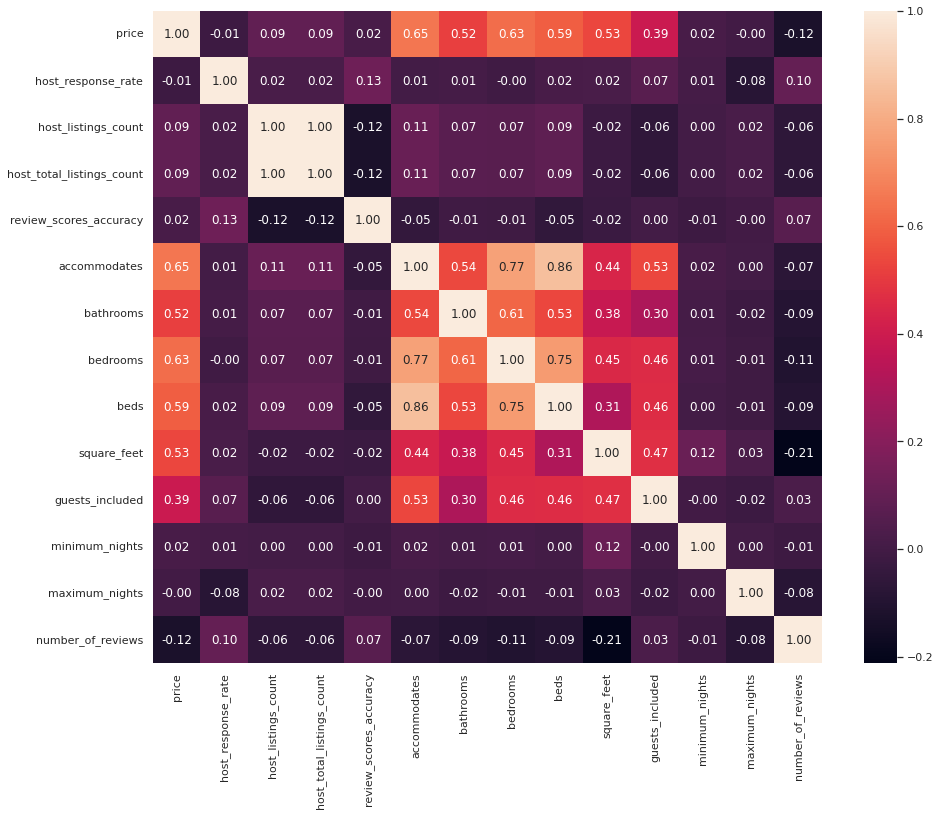

In [21]:
sns.heatmap(listings_q3.corr(), annot=True, fmt=".2f")

In [22]:
listings_q3 = listings_q3.dropna(subset=['price'])

In [23]:
y = listings_q3['price']
X = listings_q3.drop(columns=['price'])

In [24]:
num_vars = X.select_dtypes(include=['float', 'int']).columns
for col in num_vars:
    X[col].fillna((X[col].mean()), inplace=True)
    
cat_vars = listings_q3.select_dtypes(include=['object']).copy().columns
for var in  cat_vars:
    X = pd.concat([X.drop(var, axis=1), pd.get_dummies(X[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)

In [25]:
X.head()

,host_response_rate,host_listings_count,host_total_listings_count,review_scores_accuracy,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,...,extra_people_$75.00,extra_people_$8.00,extra_people_$80.00,extra_people_$85.00,extra_people_$9.00,instant_bookable_t,cancellation_policy_moderate,cancellation_policy_strict,require_guest_profile_picture_t,require_guest_phone_verification_t
0,96.000000,3.0,3.0,10.000000,4,1.0,1.0,1.0,854.618557,2,...,0,0,0,0,0,0,1,0,0,0
1,98.000000,6.0,6.0,10.000000,4,1.0,1.0,1.0,854.618557,1,...,0,0,0,0,0,0,0,1,1,1
2,67.000000,2.0,2.0,10.000000,11,4.5,5.0,7.0,854.618557,10,...,0,0,0,0,0,0,0,1,0,0
3,94.886798,1.0,1.0,9.636392,3,1.0,0.0,2.0,854.618557,1,...,0,0,0,0,0,0,0,0,0,0
4,100.000000,2.0,2.0,9.000000,6,2.0,3.0,3.0,854.618557,6,...,0,0,0,0,0,0,0,1,0,0


In [26]:
X.columns


Index(['host_response_rate', 'host_listings_count',
       'host_total_listings_count', 'review_scores_accuracy', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'square_feet', 'guests_included',
       ...
       'extra_people_$75.00', 'extra_people_$8.00', 'extra_people_$80.00',
       'extra_people_$85.00', 'extra_people_$9.00', 'instant_bookable_t',
       'cancellation_policy_moderate', 'cancellation_policy_strict',
       'require_guest_profile_picture_t',
       'require_guest_phone_verification_t'],
      dtype='object', length=105)

In [27]:
y

0        85.0
1       150.0
2       975.0
3       100.0
4       450.0
        ...  
3813    359.0
3814     79.0
3815     93.0
3816     99.0
3817     87.0
Name: price, Length: 3818, dtype: float64

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression() # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared was 0.5990901137219389 on 1146 values.'